In [1]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint   

Using TensorFlow backend.


In [2]:
# load the train and test data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
num_classes=len(np.unique(y_train))
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [5]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [6]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
size=x_train.shape[0]
end=x_train.shape[0]-5000
(x_train,x_valid)=x_train[1:end],x_train[end+1:size]
(y_train,y_valid)=y_train[1:end],y_train[end+1:size]

In [8]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(44999, 10)
(4999, 10)
(10000, 10)


In [9]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

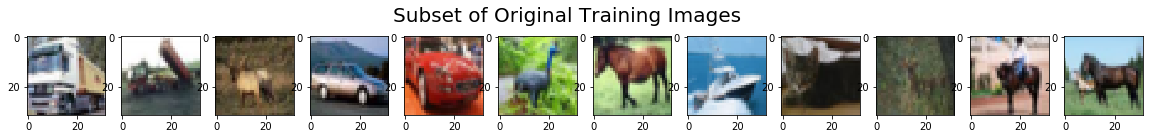

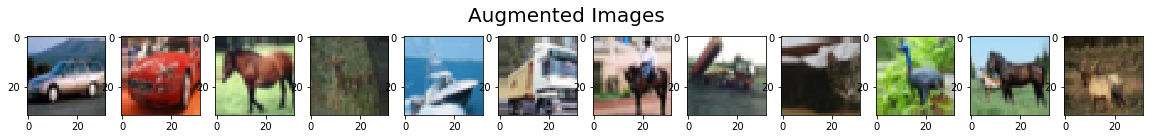

In [10]:
# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [12]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [13]:
batch_size = 64
epochs = 20

# train the model
checkpointer = ModelCheckpoint(filepath='cnn_aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/20
Epoch 00000: val_loss improved from inf to 1.54887, saving model to cnn_aug_model.weights.best.hdf5
69s - loss: 1.9026 - acc: 0.2997 - val_loss: 1.5489 - val_acc: 0.4339
Epoch 2/20
Epoch 00001: val_loss improved from 1.54887 to 1.35167, saving model to cnn_aug_model.weights.best.hdf5
69s - loss: 1.5613 - acc: 0.4317 - val_loss: 1.3517 - val_acc: 0.5119
Epoch 3/20
Epoch 00002: val_loss improved from 1.35167 to 1.21976, saving model to cnn_aug_model.weights.best.hdf5
72s - loss: 1.4272 - acc: 0.4791 - val_loss: 1.2198 - val_acc: 0.5645
Epoch 4/20
Epoch 00003: val_loss improved from 1.21976 to 1.12316, saving model to cnn_aug_model.weights.best.hdf5
72s - loss: 1.3311 - acc: 0.5197 - val_loss: 1.1232 - val_acc: 0.6051
Epoch 5/20
Epoch 00004: val_loss improved from 1.12316 to 1.07805, saving model to cnn_aug_model.weights.best.hdf5
70s - loss: 1.2543 - acc: 0.5481 - val_loss: 1.0781 - val_acc: 0.6245
Epoch 6/20
Epoch 00005: val_loss improved from 1.07805 to 0.99337, saving model

In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('cnn_aug_model.weights.best.hdf5')

In [15]:
score=model.evaluate(x_test,y_test, verbose=0)
accuracy=100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print(score)

Test accuracy: 74.1000%
[0.75138211011886602, 0.74099999999999999]
